# Fast AI Examples of State of the Art Deep Learning (www.fast.ai.com)
- Source code and build instructions you are seeing right now are here at https://github.com/albre116/DeepLearningTraining


# What is Deep Learning?
![Deep Net](images/main-qimg-33480ff9bf380946b73b0b7448429d20.webp)

<br>
<br>

![AI explained](images/main-qimg-8ac214180be0945faa6774bdb851d8a2.webp)


# Its a More sophisticated Data Science tool than Classical Machine Learning
- Learns complex patterns in high dimension that lead to Outcomes versus trying to find decision boundaries based upon a handful of pre-engineered features
- Acts like a human brain and looks for information consistency and weighs a large number of possible considerations in formulating a complex judgement
- Uses GPU's to perform Gradient Descent (a High-Dimensional series of small improvements... just like insect colony intelligence)
- Like teaching a child to read, however, you need a lot of books to have any chance of success (i.e. training data)

# MNIST Digit Challenge
![MINST](images/mnistExamples.png)


## [Results ML versus DL Algorithms](http://yann.lecun.com/exdb/mnist/)

# Kaggle is Gold Standard and Uses Are Vast
- Machine Vision
- Natural Language Understanding, Natural Language Generation
- Recommender Systems
- Market Segmentation
- Memory Intensive Applications (i.e. tricky time series)
- Reinforcement Learning (Robot Traders, Drones, Self-Driving Cars, Video Games)

# Example 1:  Machine Vision Typical Setup
![books](images/books-3.jpg)

![poor](images/no-knowledge.jpeg)

- ### You are a person who doesn't have a library of your own, you only have a couple of random medical books and you don't know how to read
- ### You need to be get some information from these books to make medicine but you don't have enough books to learn how to read
- ### What do you do?


# Duh, You Bring Someone Over Who Owns a Library and Can Read for You
![library](images/1200px-Melk_-_Abbey_-_Library.jpg)

# We do the exact same thing for Machine Vision
- ## Go Get a Pretrained net that can see
- ## Lop the head off the net which controls the final behavior
- ## Reconnect that final layer for the task at hand

![original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

## [imagenetdog](http://www.image-net.org/synset?wnid=n02098906)



# Just like Reading, Vision is Based Upon Generalizable Learnings Applied to A Final Task

![machinevision](images/Hl2H6.png)






# The Applications of Machine Vision Are Vast @ Robinson
### Can you think of a Few?

# Lets go ahead and build a dogs versus cats classifier

In [10]:
###code starts here
import sys
import os
os.getcwd()
sys.path.insert(0,"/notebooks") ###link the fast AI package

In [11]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


PATH = "/notebooks/courses/dl1/data/dogscats/"
sz=224

print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

True
True


In [32]:
###if you need the data run this
#!curl -O http://files.fast.ai/data/dogscats.zip
#!unzip dogscats.zip
#!rm -f dogscats.zip
#!mv dogscats /notebooks/courses/dl1/data/

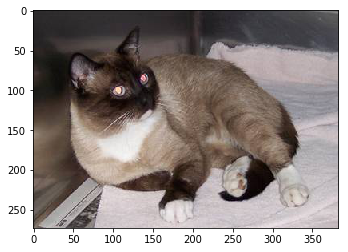

In [34]:
###lets pull an image in the vaildation file we will try to predict
files = os.listdir(f'{PATH}valid/cats')[:5]
img = plt.imread(f'{PATH}valid/cats/{files[1]}')
plt.imshow(img);

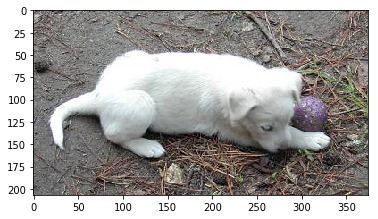

In [35]:
###lets pull an image in the vaildation file we will try to predict
files = os.listdir(f'{PATH}valid/dogs')[:5]
img = plt.imread(f'{PATH}valid/dogs/{files[1]}')
plt.imshow(img);

In [36]:
###what does that look like to a computer?
img.shape

(207, 375, 3)

In [37]:
img[:4,:4]

array([[[142, 132, 133],
        [167, 157, 158],
        [141, 131, 132],
        [110, 100, 101]],

       [[214, 205, 206],
        [169, 159, 160],
        [ 90,  80,  81],
        [ 65,  55,  56]],

       [[115, 106, 107],
        [ 92,  83,  84],
        [ 95,  86,  87],
        [139, 130, 131]],

       [[140, 134, 134],
        [116, 110, 110],
        [118, 112, 112],
        [145, 139, 139]]], dtype=uint8)

# We Split our Data Into Train, Validation, and Test Sets Prior to Modeling
### Why Don't We Fit the Model on All of the Data?
![](images/traintest.png)

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

In [38]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 63591487.80it/s]


100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


epoch      trn_loss   val_loss   accuracy                     
    0      0.046002   0.023751   0.992     
    1      0.041818   0.024254   0.991                        



[array([0.02425]), 0.991]

How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.

## Analyzing results: looking at pictures in validation data

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [39]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [41]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [42]:
log_preds[:10]

array([[-0.00007, -9.63646],
       [-0.00009, -9.2867 ],
       [-0.00046, -7.67392],
       [-0.00012, -9.01721],
       [-0.00061, -7.40555],
       [-0.00009, -9.30333],
       [-0.01198, -4.43068],
       [-0.00014, -8.85321],
       [-0.00058, -7.44876],
       [-0.00026, -8.24918]], dtype=float32)

In [43]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


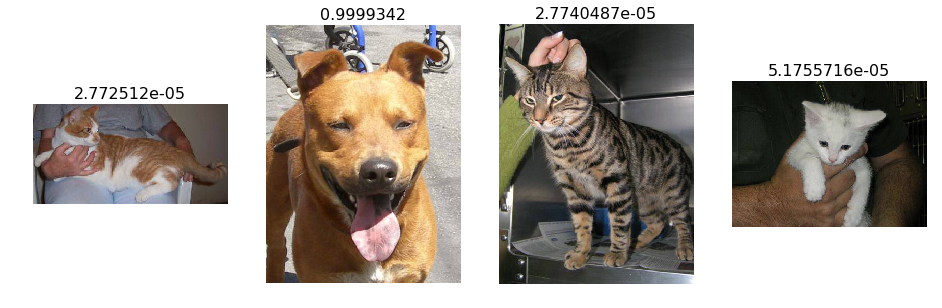

In [44]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


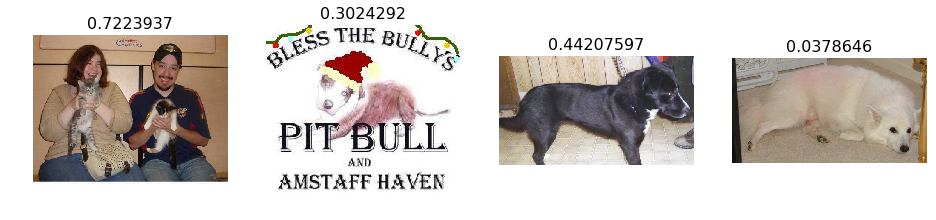

In [45]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [46]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


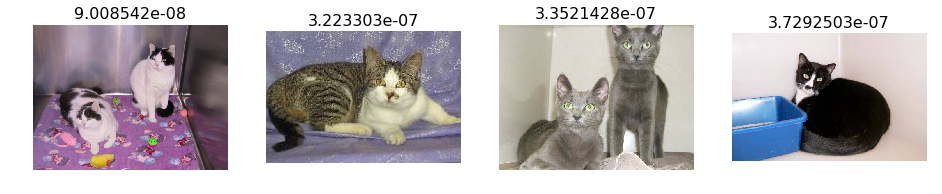

In [47]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


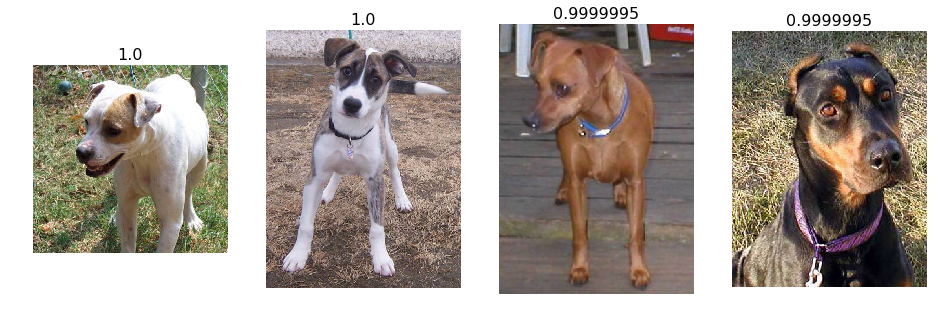

In [48]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


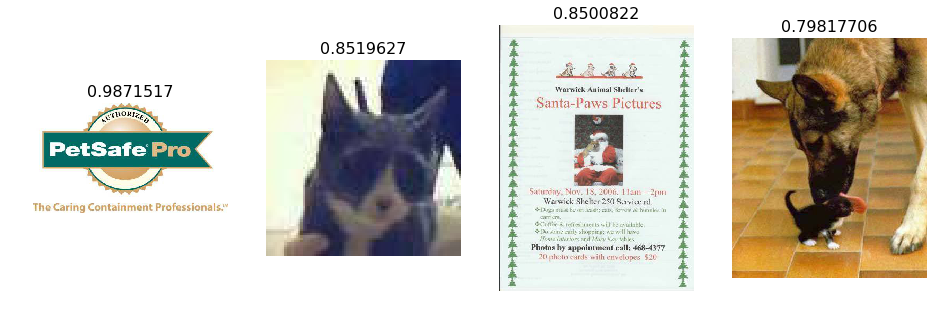

In [49]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


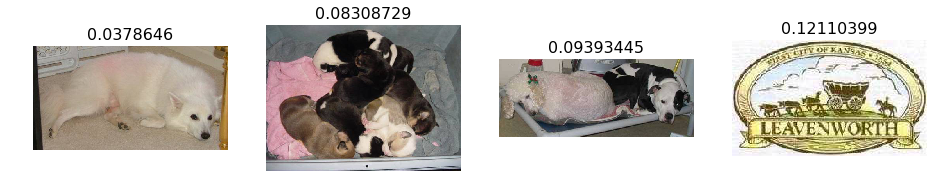

In [50]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


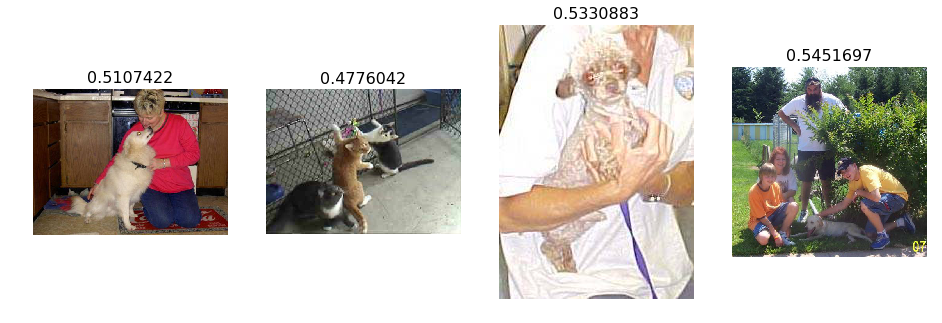

In [51]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

# Example 2 IMDB Sentiment and Language Modeling
- ### First we teach a deep net to predict the next word in a sentence using a trick called embedding (learn to read)
- ### Then we put that embedding (net that can read) into a sentiment prediction model

The [large movie view dataset](http://ai.stanford.edu/~amaas/data/sentiment/) contains a collection of 50,000 reviews from IMDB. The dataset contains an even number of positive and negative reviews. The authors considered only highly polarized reviews. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. Neutral reviews are not included in the dataset. The dataset is divided into training and test sets. The training set is the same 25,000 labeled reviews.

The **sentiment classification task** consists of predicting the polarity (positive or negative) of a given text.

However, before we try to classify *sentiment*, we will simply try to create a *language model*; that is, a model that can predict the next word in a sentence. Why? Because our model first needs to understand the structure of English, before we can expect it to recognize positive vs negative sentiment.

So our plan of attack is the same as we used for Dogs v Cats: pretrain a model to do one thing (predict the next word), and fine tune it to do something else (classify sentiment).

Unfortunately, there are no good pretrained language models available to download, so we need to create our own. To follow along with this notebook, we suggest downloading the dataset from [this location](http://files.fast.ai/data/aclImdb.tgz) on files.fast.ai.

In [209]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *

import torchtext
from torchtext import vocab, data
from torchtext.datasets import language_modeling

from fastai.rnn_reg import *
from fastai.rnn_train import *
from fastai.nlp import *
from fastai.lm_rnn import *

import dill as pickle
import spacy
!python -m spacy download en

In [210]:
#!rm -rf data/aclImdb/models

In [212]:
PATH='/notebooks/courses/dl1/data/aclImdb/'
#os.mkdir(f'{PATH}models')

TRN_PATH = 'train/all/'
VAL_PATH = 'test/all/'
TRN = f'{PATH}{TRN_PATH}'
VAL = f'{PATH}{VAL_PATH}'

%ls {PATH}

trn_files = !ls {TRN}
trn_files[:10]
review = !cat {TRN}{trn_files[1]}
review[0]

README  imdb.vocab  imdbEr.txt  models/  test/  tmp/  train/


"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

## We tokenize the text
- ### map words to integers so computer can understand them

In [213]:
###This is going to be complicated, but i'll do my best
###First we tokenize to something the computer can read
#!python -m spacy download en
spacy_tok = spacy.load('en')
TEXT = data.Field(lower=True, tokenize="spacy")
###save the model
#pickle.dump(TEXT, open(f'{PATH}models/TEXT.pkl','wb'))

This is the start of the mapping from integer IDs to unique tokens.

In [214]:
###Warning takes a long time
###skip this once loaded
bs=64; bptt=70
FILES = dict(train=TRN_PATH, validation=VAL_PATH, test=VAL_PATH)
md = LanguageModelData.from_text_files(PATH, TEXT, **FILES, bs=bs, bptt=bptt, min_freq=10)

# Train the model to Predict Next Word
- ### Men are from Mars, Women are from <_____>?
- ### The Sun Felt <____>?



fastai uses a variant of the state of the art [AWD LSTM Language Model](https://arxiv.org/abs/1708.02182) developed by Stephen Merity. A key feature of this model is that it provides excellent regularization through [Dropout](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout). There is no simple way known (yet!) to find the best values of the dropout parameters below - you just have to experiment...

However, the other parameters (`alpha`, `beta`, and `clip`) shouldn't generally need tuning.

For the model the critical things is we do an embedding in combination with a LSTM time series model
![seaworld](images/embed2.webp)
<br>
<br>
![embedconcept](images/embedword.png)
<br>
<br>
## Our Goal is to learn this embedding structure so we can later feed it into the net to predict article sentiment.  Again, the main innovation here is learning to read, what we do with it is more trivial
<br>
<br>
![netarch](images/embed.png)

## While we wait for the model to build, What applicaitons would this apply to at robinson?

### Lets take a peek at the model setup

In [215]:
# 'itos': 'int-to-string'
TEXT.vocab.itos[:12]

['<unk>', '<pad>', 'the', ',', '.', 'and', 'a', 'of', 'to', 'is', 'in', 'it']

In [216]:
# 'stoi': 'string to int'
TEXT.vocab.stoi['the']

2

# We also clip up the reviews into sentences of Approx Length
- ### Pass sentences into the model of length of about 70 words
- ### Train the model to figure out the next word based upon the past 70 words
![sentence clipping](images/matrix.png)

Here are the: # batches; # unique tokens in the vocab; # tokens in the training set; # sentences

In [217]:
len(md.trn_dl), md.nt, len(md.trn_ds), len(md.trn_ds[0].text)

(4583, 37392, 1, 20540756)

In [218]:
next(iter(md.trn_dl))

(Variable containing:
   3701    297      9  ...    1667     12     14
     68  13351    359  ...      43    173     33
      2     51     24  ...     472      6    324
         ...            ⋱           ...         
    192      6    112  ...     976     17     37
    213   3557      8  ...       3    201   1306
     64      3     79  ...       2     17     14
 [torch.cuda.LongTensor of size 73x64 (GPU 0)], Variable containing:
     68
  13351
    359
   ⋮   
    123
   1791
     37
 [torch.cuda.LongTensor of size 4672 (GPU 0)])

In [219]:
em_sz = 200  # size of each embedding vector
nh = 500     # number of hidden activations per layer
nl = 3       # number of layers
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))
learner = md.get_model(opt_fn, em_sz, nh, nl,
               dropouti=0.05, dropout=0.05, wdrop=0.1, dropoute=0.02, dropouth=0.05)
learner.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learner.clip=0.3

In [ ]:
### skip this step
learner.fit(3e-3, 4, wds=1e-6, cycle_len=1, cycle_mult=1,cycle_save_name='adam1')
learner.save_encoder('adam1_enc')

In [ ]:
###skip this step
learner.fit(3e-3, 1, wds=1e-6, cycle_len=1, 
            cycle_save_name='adam3_20')
learner.save_encoder('adam3_20_enc')

In [39]:
learner.load_cycle('adam3_20',0)
learner.load_encoder('adam3_20_enc')

In [40]:
###skip this step
learner.fit(3e-3, 1, wds=1e-6, cycle_len=5, 
            cycle_save_name='adam4_20')
learner.save_encoder('adam4_20_enc')

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      4.588111   4.461238  
    1      4.51733    4.402823                                
    2      4.464722   4.351667                                
    3      4.39962    4.312767                                
    4      4.37356    4.302008                                



In [220]:
learner.load_cycle('adam4_20',0)
learner.load_encoder('adam4_20_enc')

In [221]:
pickle.dump(TEXT, open(f'{PATH}models/TEXT.pkl','wb'))

We can play around with our language model a bit to check it seems to be working OK. First, let's create a short bit of text to 'prime' a set of predictions. We'll use our torchtext field to numericalize it so we can feed it to our language model.

In [234]:
m=learner.model
ss=""". So, it wasn't quite was I was expecting, but I really liked it anyway """
s = [sent.string.strip() for sent in spacy_tok(ss)]
t=TEXT.numericalize([s])

In [235]:
s

['.',
 'So',
 ',',
 'it',
 'was',
 "n't",
 'quite',
 'was',
 'I',
 'was',
 'expecting',
 ',',
 'but',
 'I',
 'really',
 'liked',
 'it',
 'anyway']

In [236]:
t

Variable containing:
    4
    0
    3
   11
   19
   29
  198
   19
    0
   19
 1043
    3
   24
    0
   78
  437
   11
  727
[torch.cuda.LongTensor of size 18x1 (GPU 0)]

In [237]:
# Set batch size to 1
m[0].bs=1
# Turn off dropout
m.eval()
# Reset hidden state
m.reset()
# Get predictions from model
res,*_ = m(t)
# Put the batch size back to what it was
m[0].bs=bs

In [238]:
nexts = torch.topk(res[-1], 10)[1]
[TEXT.vocab.itos[o] for o in to_np(nexts)]

['.', ',', '!', 'and', '(', '...', ';', 'because', 'as', '-']

... here we do recursive predictions and generate 50 tokens

In [239]:
print(ss,"\n")
for i in range(50):
    n=res[-1].topk(2)[1]
    n = n[1] if n.data[0]==0 else n[0]
    print(TEXT.vocab.itos[n.data[0]], end=' ')
    res,*_ = m(n[0].unsqueeze(0))
print('...')

. So, it wasn't quite was I was expecting, but I really liked it anyway  

. the movie is a little too slow and the characters are not believable . the story is not very interesting , but it is a good movie . <eos> i have seen this movie a few times , and i have to say that i was very disappointed . ...


### Sentiment

In [240]:
TEXT = pickle.load(open(f'{PATH}models/TEXT.pkl','rb'))

`sequential=False` tells torchtext that a text field should be tokenized (in this case, we just want to store the 'positive' or 'negative' single label).

`splits` is a torchtext method that creates train, test, and validation sets. The IMDB dataset is built into torchtext, so we can take advantage of that. Take a look at `lang_model-arxiv.ipynb` to see how to define your own fastai/torchtext datasets.

In [ ]:
#!pip uninstall torchtext -y

In [ ]:
#!git clone https://github.com/pytorch/text.git

In [ ]:
#!cd text && python setup.py install

In [ ]:
#!pip install torchtext

In [53]:
#import torchtext

In [241]:
###could leave this sit and not do
IMDB_LABEL = data.Field(sequential=False)
splits = torchtext.datasets.IMDB.splits(TEXT, IMDB_LABEL, 'data/')

In [242]:
t = splits[0].examples[1]

In [243]:
t.label, ' '.join(t.text[:500])

('pos',
 "zentropa is the most original movie i 've seen in years . if you like unique thrillers that are influenced by film noir , then this is just the right cure for all of those hollywood summer blockbusters clogging the theaters these days . von trier 's follow - ups like breaking the waves have gotten more acclaim , but this is really his best work . it is flashy without being distracting and offers the perfect combination of suspense and dark humor . it 's too bad he decided handheld cameras were the wave of the future . it 's hard to say who talked him away from the style he exhibits here , but it 's everyone 's loss that he went into his heavily theoretical dogma direction instead .")

In [244]:
md2 = TextData.from_splits(PATH, splits, bs)

In [245]:
m3 = md2.get_model(opt_fn, 1500, bptt, emb_sz=em_sz, n_hid=nh, n_layers=nl, 
           dropout=0.1, dropouti=0.4, wdrop=0.5, dropoute=0.05, dropouth=0.3)
m3.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
m3.load_encoder(f'adam4_20_enc')

Because we're fine-tuning a pretrained model, we'll use differential learning rates, and also increase the max gradient for clipping, to allow the SGDR to work better.

In [246]:
m3.clip=25.
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])

In [ ]:
###do not run
m3.freeze_to(-1)
m3.fit(lrs/2, 1, metrics=[accuracy])

In [88]:
###do not run
m3.unfreeze()
m3.fit(lrs, 1, metrics=[accuracy], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.418563   0.292376   0.880459  



HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.377339   0.264664   0.89383   



[0.2646641, 0.8938299233041456]

In [89]:
### do not run
m3.fit(lrs, 7, metrics=[accuracy], cycle_len=2, cycle_save_name='imdb2')

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.339885   0.251396   0.90207   
    1      0.333195   0.23386    0.907009                    
    2      0.31884    0.220551   0.913475                    
    3      0.303451   0.223049   0.913795                    
    4      0.311872   0.215408   0.916344                    
    5      0.277328   0.218381   0.917207                    
    6      0.286998   0.214582   0.920269                    
    7      0.285171   0.207539   0.922115                    
    8      0.285422   0.19979    0.923753                    
    9      0.266295   0.197609   0.925767                    
    10     0.276451   0.199172   0.924113                    
    11     0.254736   0.206501   0.923745                    
    12     0.256704   0.204644   0.925847                    
    13     0.252577   0.194495   0.928197                    



[0.19449484, 0.9281969309767799]

In [247]:
m3.load_cycle('imdb2', 6)

In [248]:
preds1,targs = m3.predict_with_targs()

In [249]:
len(targs)

25000

In [250]:
preds1

array([[-20.47315,   3.42917,  -3.15834],
       [-18.47654,   4.19525,  -3.83363],
       [-20.33207,   3.73128,  -3.5259 ],
       ...,
       [-19.09237,  -0.22772,   0.648  ],
       [-18.75948,   0.05428,   0.42809],
       [-18.71409,   0.09052,   0.39926]], dtype=float32)

In [251]:
targs

array([1, 1, 1, ..., 1, 1, 1])

In [252]:
import inspect
lines = inspect.getsourcelines(accuracy_np)
print("".join(lines[0]))

def accuracy_np(preds, targs):
    preds = np.argmax(preds, 1)
    return (preds==targs).mean()



In [253]:
accuracy_np(*m3.predict_with_targs())

0.92864

A recent paper from Bradbury et al, [Learned in translation: contextualized word vectors](https://einstein.ai/research/learned-in-translation-contextualized-word-vectors), has a handy summary of the latest academic research in solving this IMDB sentiment analysis problem. Many of the latest algorithms shown are tuned for this specific problem.

![image.png](images/paper.png)

As you see, we just got a new state of the art result in sentiment analysis, decreasing the error from 5.9% to 5.5%! You should be able to get similarly world-class results on other NLP classification problems using the same basic steps.
